## Working with Data

In this problem set, I will focus on the practical aspects of working with real-world datasets. The goal is to apply various data wrangling, cleaning, and transformation techniques to prepare the data for analysis. Key tasks include:

1. **Data Cleaning**: Handling missing values and addressing inconsistencies in the dataset.
2. **Data Transformation**: Applying feature engineering techniques to create useful variables.
3. **Exploratory Data Analysis**: Using visualizations and summary statistics to uncover patterns and insights.

This problem set emphasizes the importance of preparing data properly before any analysis or modeling can take place.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Describing the animal shelter data 

In [4]:
data = pd.read_csv('animal-shelter-intakes-and-outcomes-1.csv')

In [5]:
data.head

<bound method NDFrame.head of       Animal ID     Animal Name Animal Type Primary Color Secondary Color  \
0       A002500        PENELOPE         DOG         WHITE             NaN   
1       A226033          SNOOPY         DOG         WHITE             NaN   
2       A234250            NINA         DOG    BR BRINDLE             NaN   
3       A238953            CECE         DOG          BUFF             NaN   
4       A242600           BARBY         DOG         BLACK             NaN   
...         ...             ...         ...           ...             ...   
39881   A707543  GEORGIE (PUP4)         DOG           TAN             NaN   
39882   A707556          *VENTI         CAT    GRAY TABBY             NaN   
39883   A707578           *SNOW         CAT         WHITE             NaN   
39884   A707580           *OREO         CAT         BLACK           WHITE   
39885   A707606           *LOLA         DOG         BLACK           BROWN   

            Sex         DOB   Age Intake Date

In [6]:
data.describe

<bound method NDFrame.describe of       Animal ID     Animal Name Animal Type Primary Color Secondary Color  \
0       A002500        PENELOPE         DOG         WHITE             NaN   
1       A226033          SNOOPY         DOG         WHITE             NaN   
2       A234250            NINA         DOG    BR BRINDLE             NaN   
3       A238953            CECE         DOG          BUFF             NaN   
4       A242600           BARBY         DOG         BLACK             NaN   
...         ...             ...         ...           ...             ...   
39881   A707543  GEORGIE (PUP4)         DOG           TAN             NaN   
39882   A707556          *VENTI         CAT    GRAY TABBY             NaN   
39883   A707578           *SNOW         CAT         WHITE             NaN   
39884   A707580           *OREO         CAT         BLACK           WHITE   
39885   A707606           *LOLA         DOG         BLACK           BROWN   

            Sex         DOB   Age Intake 

#### Summarize

Answered the following questions to describe and summarize the data:

- How many records are in the data?
- How many unique animals are in the data?
- How many types of animals are included in the data? What types are these?
- Across how many years does the data span? What are the years?
- How many primarily black cats less than 3 years of age were found in Los Alamitos?
- What is the most common primary/secondary color combination in the data (consider only when both colors are listed)?

In [8]:
#How many records are in the data?
num_records = data.shape[0]
print( num_records)

39886


In [9]:
#How many unique animals are in the data?
num_unique_animals = data['Animal ID'].nunique()
print(num_unique_animals)

38554


In [10]:
# Number of types of animals and the types
animal_types = data['Animal Type'].nunique()
unique_animal_types = data['Animal Type'].unique()
print(animal_types)
print(unique_animal_types)


10
['DOG' 'CAT' 'RABBIT' 'REPTILE' 'BIRD' 'OTHER' 'LIVESTOCK' 'WILD'
 'GUINEA PIG' 'AMPHIBIAN']


In [11]:
# Data span in years and the years
data['Intake Date'] = pd.to_datetime(data['Intake Date'])
years_span = data['Intake Date'].dt.year.unique()
years_span_count = len(years_span)
print( years_span)
print(years_span_count)


[2017 2018 2020 2021 2019 2022 2023]
7


In [12]:
# Number of primarily black cats less than 3 years of age found in Los Alamitos
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['Age'] = (pd.to_datetime('today') - data['DOB']).dt.days / 365.25
black_cats_los_alamitos = data[(data['Animal Type'] == 'CAT') & 
                               (data['Primary Color'] == 'BLACK') & 
                               (data['Age'] < 3) & 
                               (data['Jurisdiction'].str.upper() == 'LOS ALAMITOS')].shape[0]
print( black_cats_los_alamitos)

15


In [13]:
# Most common primary/secondary color combination
color_combinations = data.dropna(subset=['Primary Color', 'Secondary Color'])
most_common_color_combination = color_combinations.groupby(['Primary Color', 'Secondary Color']).size().idxmax()

#### Typical ages

What is the typical age of animals in the data?

In [15]:
# Calculate the mean and median age

mean_age = data['Age'].mean()
median_age = data['Age'].median()

mean_age, median_age

(6.905465792836545, 6.464065708418891)

#### Defining ages 

In [17]:
#  I initially used the mean and median ages. These are common measures of central tendency that help to understand the typical value
#in a dataset. The mean provides the average age, while the median gives the middle value when the ages are sorted.

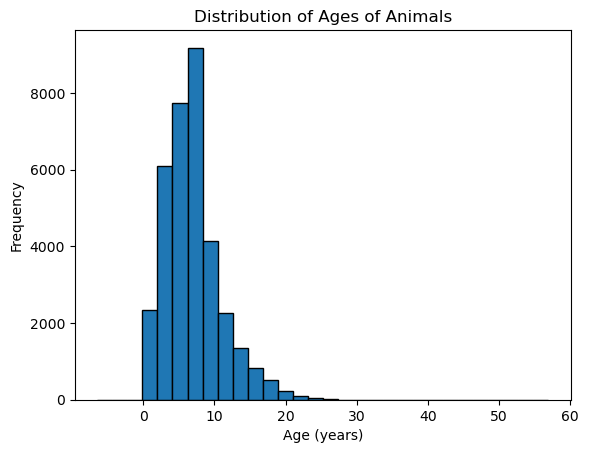

(5023,
 5023,
 count    34863.000000
 mean         6.905466
 std          3.900592
 min         -6.447639
 25%          4.168378
 50%          6.464066
 75%          8.609172
 max         56.892539
 Name: Age, dtype: float64,
       Animal ID Animal Name Animal Type Primary Color Secondary Color     Sex  \
 8022    A600476      MRS. T     REPTILE         BROWN             NaN  Female   
 13248   A706980         NaN     REPTILE         GREEN           BROWN    Male   
 27323   A590980       STEVE     REPTILE         GREEN           BROWN    Male   
 28628   A611828         NaN     REPTILE           TAN           BROWN    Male   
 30963   A656513           *         CAT         BLACK           WHITE    Male   
 
              DOB        Age Intake Date  Intake Condition  ... Intake Subtype  \
 8022  1967-11-26  56.892539  2017-11-26            NORMAL  ...     OWNER DIED   
 13248 1993-09-15  31.088296  2023-09-15            NORMAL  ...          FIELD   
 27323 1993-05-28  31.389459  2017

In [18]:
# Checking for missing data in DOB
missing_dob = data['DOB'].isnull().sum()
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
data['Age'] = (pd.to_datetime('today') - data['DOB']).dt.days / 365.25
missing_age = data['Age'].isnull().sum()
# Descriptive statistics of Age
age_descriptive_stats = data['Age'].describe()

# Identifying any implausible or invalid entries (negative ages, extremely high ages)
implausible_ages = data[(data['Age'] < 0) | (data['Age'] > 30)]

# Distribution of ages
plt.hist(data['Age'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of Animals')
plt.show()

# Checking ages by animal type
ages_by_type = data.groupby('Animal Type')['Age'].describe()

# Output results
missing_dob, missing_age, age_descriptive_stats, implausible_ages, ages_by_type

#### Ages by jurisdiction 

computed typical animal age by jurisdiction. Found out which three jurisdictions have the highest animal age.  Justified  choice of age by calculation and animal/jurisdiction grouping(s).

In [20]:
# Compute typical animal age by jurisdiction using the median to handle outliers and skewness
age_by_jurisdiction_median = data.groupby('Jurisdiction')['Age'].median()

# Sorting jurisdictions by median age to find the top three with the highest animal age
top_jurisdictions_median = age_by_jurisdiction_median.sort_values(ascending=False).head(3)

top_jurisdictions_median

Jurisdiction
TORRANCE AC    18.384668
DISTRICT2       9.607118
DISTRICT7       9.182752
Name: Age, dtype: float64

#### Intake seasonality

One may wonder whether intakes are in any way related to weather. We do not have weather information here but let’s analyze how intakes are related to seasons. Which seasons have the most intakes? Why might this be the case? In the communication of my analysis I used one graphical visualization and one tabular respresentation of the findings.

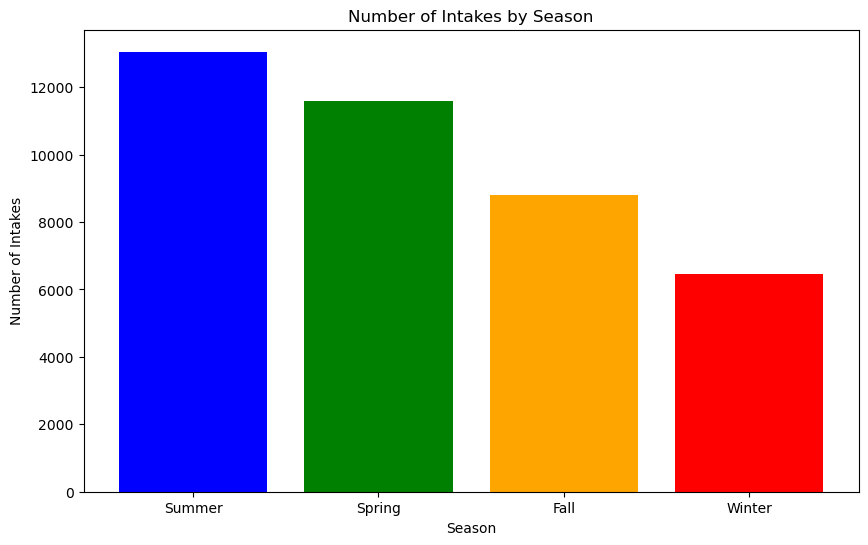

,Season,Number of Intakes
0,Summer,13049
1,Spring,11589
2,Fall,8793
3,Winter,6455


In [22]:
# Extract the month from the intake date
data['Intake Month'] = data['Intake Date'].dt.month

# Define seasons based on months
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data['Season'] = data['Intake Month'].apply(month_to_season)

# Count the number of intakes by season
intakes_by_season = data['Season'].value_counts()

# Convert to a DataFrame for tabular representation
intakes_by_season_df = intakes_by_season.reset_index()
intakes_by_season_df.columns = ['Season', 'Number of Intakes']

# Plot the number of intakes by season
plt.figure(figsize=(10, 6))
plt.bar(intakes_by_season.index, intakes_by_season.values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Season')
plt.ylabel('Number of Intakes')
plt.title('Number of Intakes by Season')
plt.show()

# Display the DataFrame
intakes_by_season_df

### Challenging the Results

In this section, I will reflect on the findings and discuss any concerns regarding the results:

- **Original Question**: How well defined was the original question? After completing the analysis, I will reconsider if the initial question was specific enough and whether it aligns with the dataset's limitations.
- **Feasibility of Answering the Question**: Based on the data and results, do I still believe this question can be fully answered using the provided dataset? I will evaluate the adequacy of the dataset for drawing valid conclusions.
- **Ethical and Privacy Concerns**: I will discuss any ethical or privacy concerns raised during the analysis, especially if the dataset contains sensitive information. How does the analysis respect data privacy, and are there any risks associated with publishing or using the findings?

In [25]:
'''The exploratory analyses highlighted concerns with data quality, including missing and implausible entries, which could 
affect the accuracy of findings. While the dataset provides a basis for answering questions about typical animal ages and seasonal intakes,
the interpretations should be cautious and acknowledge potential confounding factors. Ethical and privacy considerations are crucial, 
particularly regarding the anonymization of sensitive data and the responsible communication of findings.'''

'The exploratory analyses highlighted concerns with data quality, including missing and implausible entries, which could \naffect the accuracy of findings. While the dataset provides a basis for answering questions about typical animal ages and seasonal intakes,\nthe interpretations should be cautious and acknowledge potential confounding factors. Ethical and privacy considerations are crucial, \nparticularly regarding the anonymization of sensitive data and the responsible communication of findings.'

### Pets returned to owner in Long Beach

For this problem, only considered instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner.

In [29]:
returned_to_owner_long_beach = data[(data['Jurisdiction'] == 'LONG BEACH') & (data['Outcome Type'] == 'RETURN TO OWNER')].shape[0]
returned_to_owner_long_beach

3739

In [30]:
3739

3739

#### How many types of animals?

How many types of animals are in these records?

In [32]:
long_beach_rto_data = data[(data['Jurisdiction'] == 'LONG BEACH') & (data['Outcome Type'] == 'RETURN TO OWNER')]

# Count the number of unique animal types returned to their owners
unique_animal_types_rto = long_beach_rto_data['Animal Type'].nunique()

unique_animal_types_rto

8

#### Which types of animals?

Which types of animals are present in the entire data set that are not present when looking at instances where the jurisdiction is Long Beach and the outcome is that the animal was returned to owner?

In [39]:
# Unique animal types in the entire dataset
unique_animal_types_all = set(data['Animal Type'].unique())

# Unique animal types in the 'returned to owner' subset
unique_animal_types_rto = set(long_beach_rto_data['Animal Type'].unique())

# Animal types not returned to owner
missing_animal_types = unique_animal_types_all - unique_animal_types_rto

# Show missing types
missing_animal_types

{'AMPHIBIAN', 'LIVESTOCK'}

#### How many of each type of animals?

How many unique animals (not records) are there for each animal from Long Beach where the animal was returned to owner?

In [41]:
# Count unique animals by type in Long Beach data
animal_counts_by_type = long_beach_rto_data.groupby('Animal Type')['Animal ID'].nunique()
animal_counts_by_type

Animal Type
BIRD            14
CAT            368
DOG           2993
GUINEA PIG       2
OTHER            1
RABBIT           7
REPTILE         15
WILD             1
Name: Animal ID, dtype: int64

#### (e) Decreases during COVID

Did all animal types see a decrease in intakes during 2020 compared to their pre-2020 annual average? Which animal types saw the largest numerical drop and the largest percent drop?

In [49]:
# Convert 'Intake Date' to datetime and extract the year
data['Intake Year'] = pd.to_datetime(data['Intake Date']).dt.year

# Calculate pre-2020 average intake per animal type (using count of records as intake count)
pre_2020_avg = data[data['Intake Year'] < 2020].groupby('Animal Type').size().mean()

# Calculate intake in 2020
intake_2020 = data[data['Intake Year'] == 2020].groupby('Animal Type').size()

# Calculate the numerical and percentage drops
numerical_drop = pre_2020_avg - intake_2020
percentage_drop = (numerical_drop / pre_2020_avg) * 100

# Display the largest numerical and percentage drops
largest_numerical_drop = numerical_drop.idxmax()
largest_percentage_drop = percentage_drop.idxmax()

largest_numerical_drop, largest_percentage_drop

('LIVESTOCK', 'LIVESTOCK')

#### Reflect and Question 

What are your thoughts on the questions (and answers) for problem 3? Were you able to answer all of these questions? Are all questions well-defined? Is the data good enough to answer all these?

The questions are straightforward and cover important points like intake trends and outcomes. That said, the one about the “largest percent drop” during COVID could use more detail on how exactly that’s being measured.

The dataset is decent, but it’s missing external factors like shelter policies or government rules during COVID, which would help explain the trends better. There weren’t any big data quality issues, though if the dates were missing or wrong, it could throw off the results.

In general, the questions were answerable with what’s available, but having more context on COVID’s impact would make the analysis stronger. Adding more variables or diving into some statistical models could also bring out more insights on what’s driving outcomes and intake trends.